In [11]:
import pandas as pd
low_memory=False
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [9]:
filename = r'E:\Fatec\ADS\SEMESTRE 3\ESTRUTURAS DE DADOS\Analise de Dados\dados_saude.csv'
df = pd.read_csv(filename, delimiter=';',
                 encoding = 'ISO-8859-1',
                 error_bad_lines = False)

c:\users\black\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (18,59,61,62,63,103,105,117,119,126,128,129,130,132) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
df.shape

(393979, 134)

In [12]:
for k in (11, 13, 17, 19, 22, 118, 121):
    print (k, df.columns[k])

11 CS_SEXO
13 NU_IDADE_N
17 CS_RACA
19 CS_ESCOL_N
22 SG_UF
118 CLASSI_FIN
121 EVOLUCAO


In [13]:
df = df[['CS_SEXO', 'NU_IDADE_N', 'CS_RACA', 'CS_ESCOL_N', 'SG_UF', 'CLASSI_FIN', 'EVOLUCAO']]

In [14]:
troca_raça = {1:'Branca', 2:'Preta', 3:'Amarela',
              4:'Parda', 5:'Indígena', 9:'Ignorado'}

troca_escolaridade = {0:'Sem', 1:'Fund1', 
                      2:'Fund2', 3:'Médio',
                      4:'Superior', 
                      5:'Não se aplica',
                      9:'Ignorado'}

troca_classificação = {1:'SRAG por influenza',
                       2: 'SRAG por outro vírus respiratório',
                       3: 'SRAG por outro agente Etiológico',
                       4: 'SRAG não especificado',
                       5: 'COVID-19'}

troca_evolução = {1:'Cura', 2:'Óbito', 9:'Ignorado'}

In [15]:
df.loc[(df.CS_RACA.isnull()), 'CS_RACA'] = 9
df['CS_RACA'] = df['CS_RACA'].apply(lambda x: troca_raça[x])

df.loc[(df.CS_ESCOL_N.isnull()), 'CS_ESCOL_N'] = 9
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].apply(lambda x: troca_escolaridade[x])

df.loc[(df.CLASSI_FIN.isnull()), 'CLASSI_FIN'] = 4
df['CLASSI_FIN'] = df['CLASSI_FIN'].apply(lambda x: troca_classificação[x])

df.loc[(df.EVOLUCAO.isnull()), 'EVOLUCAO'] = 9
df['EVOLUCAO'] = df['EVOLUCAO'].apply(lambda x: troca_evolução[x])

In [16]:
df.sample(50).sort_values('NU_IDADE_N')

,CS_SEXO,NU_IDADE_N,CS_RACA,CS_ESCOL_N,SG_UF,CLASSI_FIN,EVOLUCAO
340360,M,2,Parda,Não se aplica,SP,SRAG não especificado,Cura
9617,M,19,Parda,Fund2,PR,SRAG não especificado,Cura
126751,M,23,Branca,Ignorado,PR,SRAG não especificado,Cura
180642,F,33,Ignorado,Ignorado,RJ,SRAG não especificado,Ignorado
307770,F,34,Parda,Fund1,AC,COVID-19,Ignorado
146825,F,38,Ignorado,Ignorado,SP,COVID-19,Cura
22213,M,38,Parda,Ignorado,SP,COVID-19,Cura
190096,M,38,Ignorado,Ignorado,BA,SRAG não especificado,Ignorado
184537,F,40,Ignorado,Ignorado,MG,SRAG não especificado,Ignorado
333641,M,42,Ignorado,Médio,SC,COVID-19,Cura


Text(0.5, 1.0, 'Cinco estados com mais casos de SRAG')

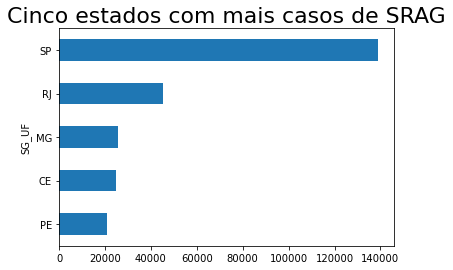

In [17]:
df.groupby('SG_UF').size().sort_values().tail(5).plot(kind='barh').set_title('Cinco estados com mais casos de SRAG', fontsize=22)

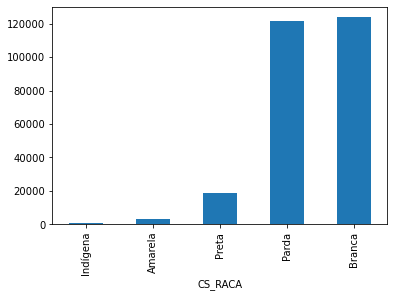

In [19]:
df.query('CS_RACA != "Ignorado"').groupby('CS_RACA').size().sort_values().plot(kind='bar')

In [20]:
df.groupby('CS_RACA').size().sort_values(ascending=False)

CS_RACA
Ignorado    125776
Branca      123786
Parda       121316
Preta        18543
Amarela       3495
Indígena      1063
dtype: int64

In [21]:
df.groupby('CS_ESCOL_N').size().sort_values(ascending=False)

CS_ESCOL_N
Ignorado         250267
Médio             40841
Fund1             35329
Fund2             23279
Superior          20004
Não se aplica     13430
Sem               10829
dtype: int64

Text(0.5, 1.0, 'Óbito por SRAG por raça')

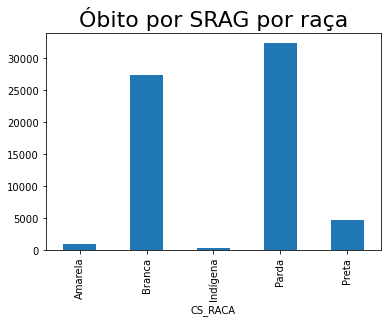

In [22]:
df.query('EVOLUCAO == "Óbito" and CS_RACA != "Ignorado"').groupby('CS_RACA').size().plot(kind='bar').set_title('Óbito por SRAG por raça', fontsize=22)

Text(0.5, 1.0, 'Índice de cura de SRAG por raça')

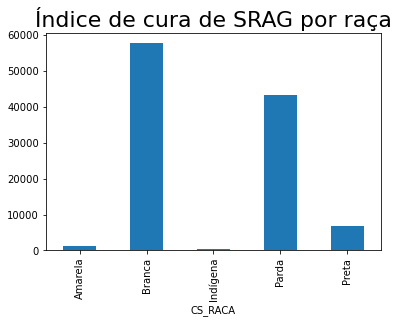

In [23]:
df.query('EVOLUCAO == "Cura" and CS_RACA != "Ignorado"').groupby('CS_RACA').size().plot(kind='bar').set_title('Índice de cura de SRAG por raça', fontsize=22)

Text(0.5, 1.0, 'Óbito por SRAG por nível de escolaridade')

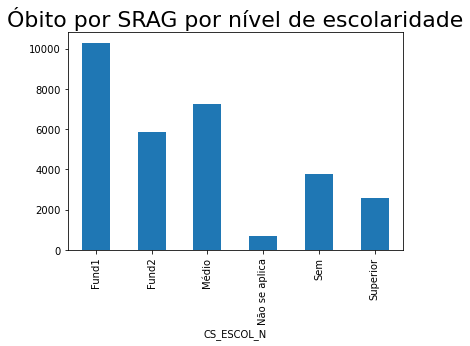

In [24]:
df.query('EVOLUCAO == "Óbito" and CS_ESCOL_N != "Ignorado"').groupby('CS_ESCOL_N').size().plot(kind='bar').set_title('Óbito por SRAG por nível de escolaridade', fontsize = 22)

Text(0.5, 1.0, 'Índice de cura de SRAG por nível de escolaridade')

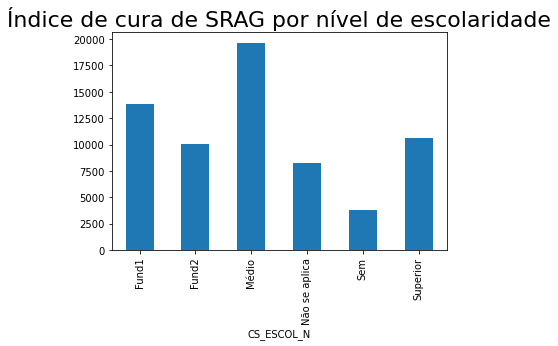

In [25]:
df.query('EVOLUCAO == "Cura" and CS_ESCOL_N != "Ignorado"').groupby('CS_ESCOL_N').size().plot(kind='bar').set_title('Índice de cura de SRAG por nível de escolaridade', fontsize = 22)

In [26]:
df.groupby('EVOLUCAO').size().sort_values(ascending=False)

EVOLUCAO
Cura        157564
Ignorado    140856
Óbito        95559
dtype: int64

Text(0.5, 1.0, 'Óbito por COVID-19 por idade')

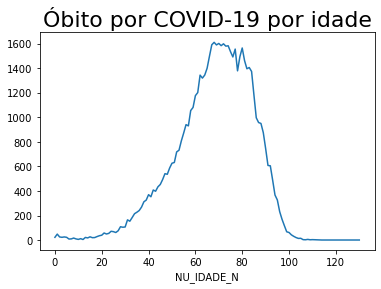

In [27]:
df.query('CLASSI_FIN == "COVID-19" and EVOLUCAO == "Óbito"').groupby('NU_IDADE_N').size().plot(kind='line').set_title('Óbito por COVID-19 por idade', fontsize=22)

Text(0.5, 1.0, 'Óbitos por SRAG por UF')

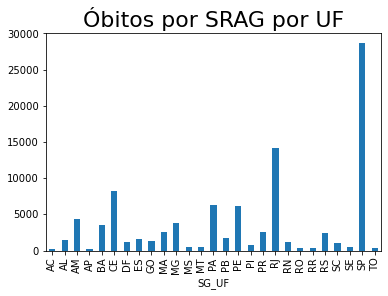

In [28]:
df.query('EVOLUCAO == "Óbito"').groupby('SG_UF').size().plot(kind='bar').set_title('Óbitos por SRAG por UF', fontsize=22)

Text(0.5, 1.0, 'Óbitos por COVID por sexo')

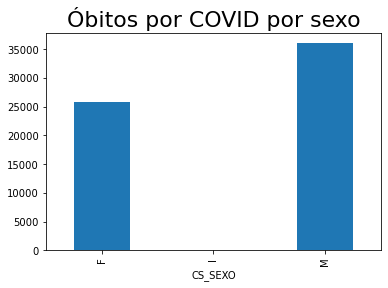

In [29]:
df.query('EVOLUCAO == "Óbito" and CLASSI_FIN == "COVID-19"').groupby('CS_SEXO').size().plot(kind='bar').set_title('Óbitos por COVID por sexo', fontsize=22)